# Problem statement

- A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

- Now, the stackholder wants to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

# Data

- Variable	Definition
- User_ID	User ID
- Product_ID	Product ID
- Gender	Sex of User
- Age	Age in bins
- Occupation	Occupation (Masked)
- City_Category	Category of the City (A,B,C)
- Stay_In_Current_City_Years	Number of years stay in current city
- Marital_Status	Marital Status
- Product_Category_1	Product Category (Masked)
- Product_Category_2	Product may belongs to other category also (Masked)
- Product_Category_3	Product may belongs to other category also (Masked)
- Purchase	Purchase Amount (Target Variable)

In [1]:
from pyforest import *

In [2]:
df_train=pd.read_csv(r"C:\Users\Ranjit M\Downloads\Analytic Vidya\train.csv")

<IPython.core.display.Javascript object>

In [3]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
#lets cheking the Datasets shap
df_train.shape

(550068, 12)

In [5]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
df_train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [7]:
#lets have a look on info of tghe data sets
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Age should be treated as a numerical column

City_Category we can convert this to a numerical column and should look at the frequency of each city category.

Gender has two values and should be converted to binary values

Product_Category_2 and Product_Category_3 have null values

In [8]:
#cheking the null values
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
'''from above result we can see that Product_Category_2 and Product_Category_3 have NaN values
lets see what is the Percentage'''
df_train.isnull().sum()/df_train.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

<IPython.core.display.Javascript object>

<AxesSubplot:>

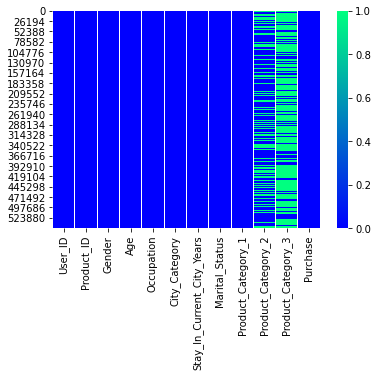

In [10]:
#lets look the nan values with heat map
sns.heatmap(df_train.isnull(),
            cmap='winter')

In [11]:
#lets handel the NaN values
#handeling the Nan value
def Handel_Nan(df):
    cn=df.columns
    for i in cn:
        if df[i].dtype!='object':
            df[i].fillna(df[i].mean(),inplace=True)
        else:
            df[i].fillna(df[i].mode()[0],inplace=True)
Handel_Nan(df_train)

<IPython.core.display.Javascript object>

<AxesSubplot:>

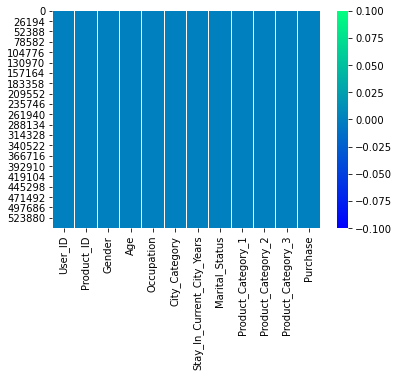

In [12]:
#lets look the nan values with heat map
sns.heatmap(df_train.isnull(),
            cmap='winter')

we can see from the above plot that we successfully handel the NaN values

# Unique elements in each attributes

In [13]:
df_train.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

# Univariant analysis

In [14]:
df_train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

# User_ID 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

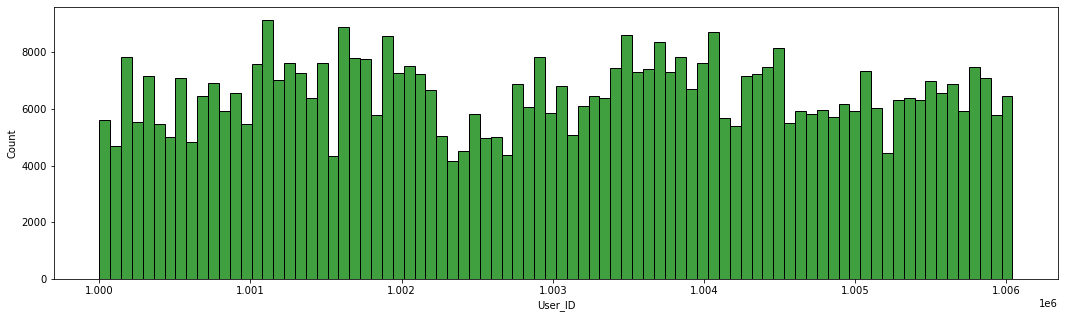

In [15]:
plt.figure(figsize=(18,5))
sns.histplot(x=df_train.User_ID,color='g')
plt.show()

# Product_ID

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

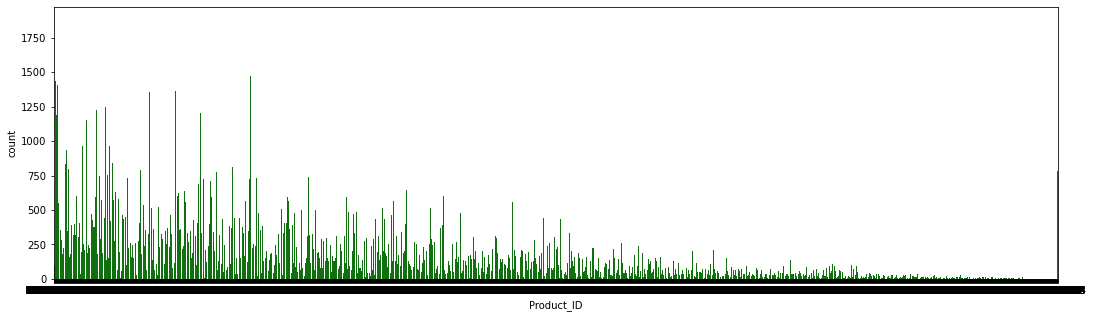

In [16]:
plt.figure(figsize=(18,5))
sns.countplot(x=df_train.Product_ID,color='g')
plt.show()

# Gender

<IPython.core.display.Javascript object>

M    414259
F    135809
Name: Gender, dtype: int64


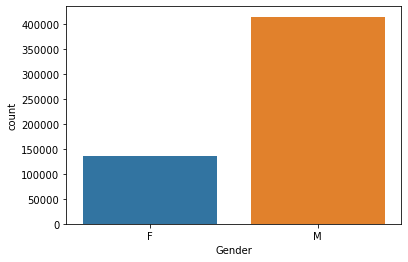

In [17]:
sns.countplot(x=df_train.Gender)
print(df_train.Gender.value_counts())

# Age

In [18]:
df_train.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [19]:
df_train.Age=df_train.Age.replace({'55+':'senior citizen','0-17':'minnor'})

In [20]:
df_train.Age.value_counts()

26-35             219587
36-45             110013
18-25              99660
46-50              45701
51-55              38501
senior citizen     21504
minnor             15102
Name: Age, dtype: int64

26-35             219587
36-45             110013
18-25              99660
46-50              45701
51-55              38501
senior citizen     21504
minnor             15102
Name: Age, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

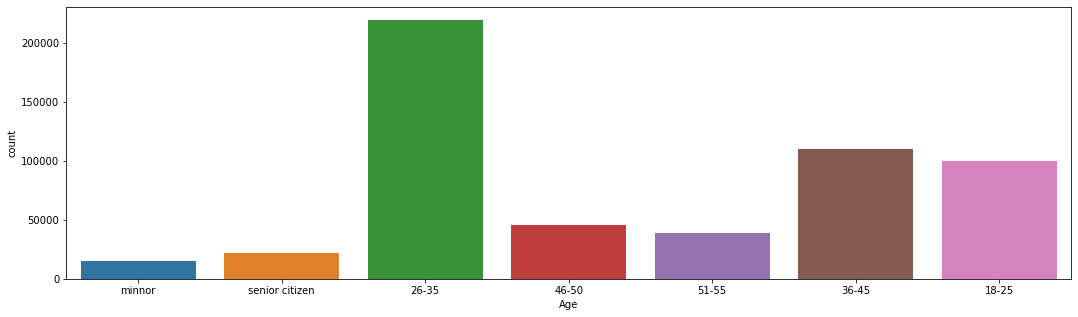

In [21]:
print(df_train.Age.value_counts())
plt.figure(figsize=(18,5))
sns.countplot(x=df_train.Age)
plt.show()

# Occupation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

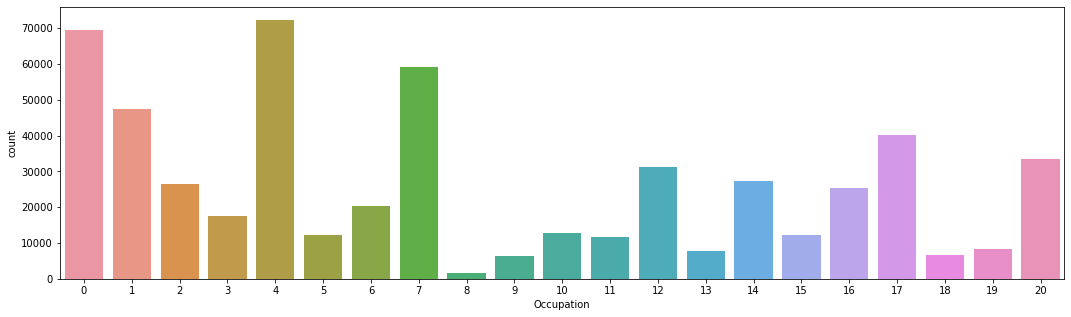

In [22]:
plt.figure(figsize=(18,5))
sns.countplot(x=df_train.Occupation)
plt.show()

# City_Category

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

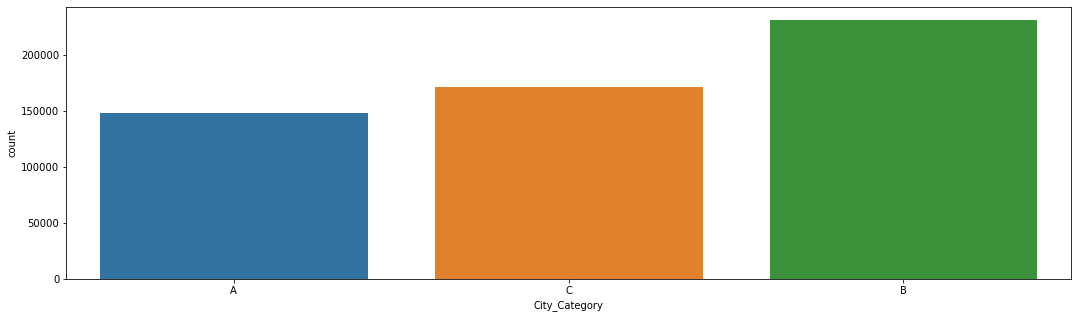

In [23]:
plt.figure(figsize=(18,5))
sns.countplot(x=df_train.City_Category)
plt.show()

# Stay_In_Current_City_Years

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

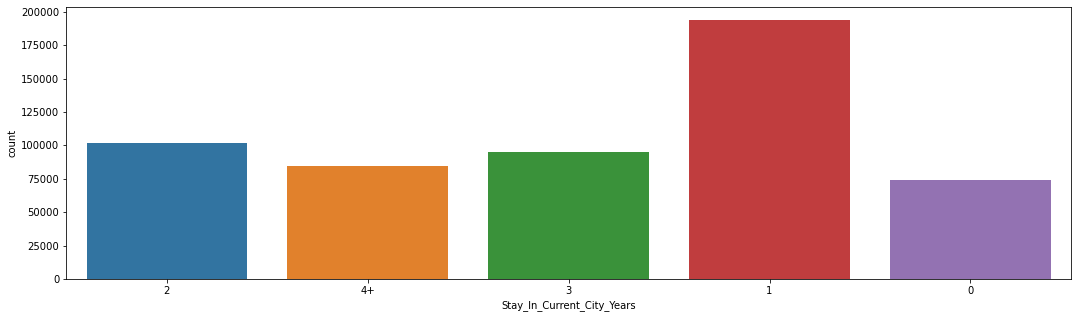

In [24]:
plt.figure(figsize=(18,5))
sns.countplot(x=df_train.Stay_In_Current_City_Years)
plt.show()

# Marital_Status

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

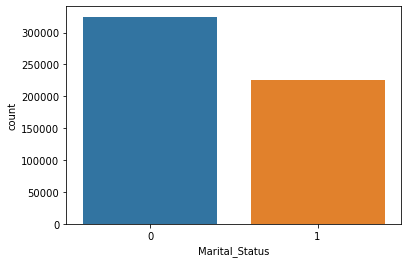

In [25]:
sns.countplot(x=df_train.Marital_Status)

# Product_Category_1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

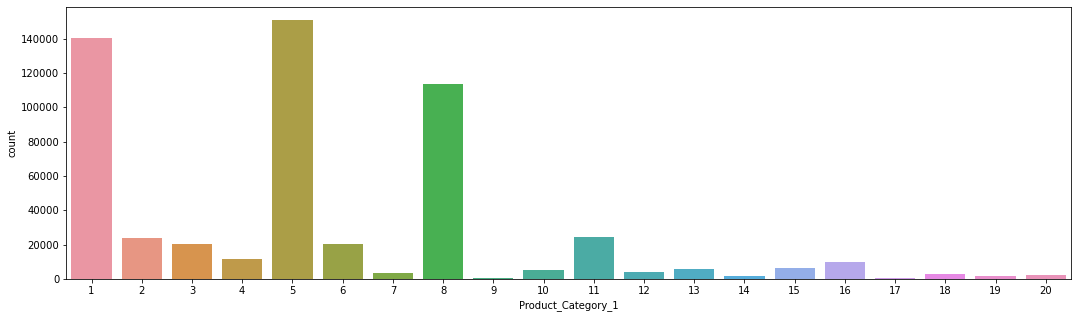

In [26]:
plt.figure(figsize=(18,5))
sns.countplot(x=df_train.Product_Category_1)
plt.show()

# Product_Category_2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

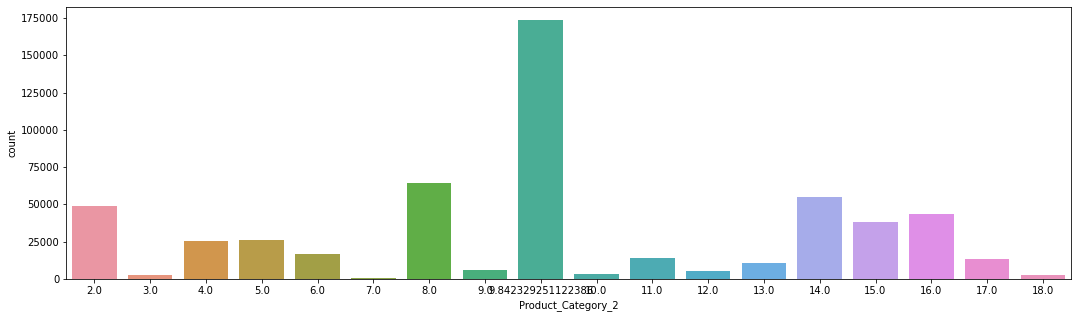

In [27]:
plt.figure(figsize=(18,5))
sns.countplot(x=df_train.Product_Category_2)
plt.show()

# Product_Category_3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

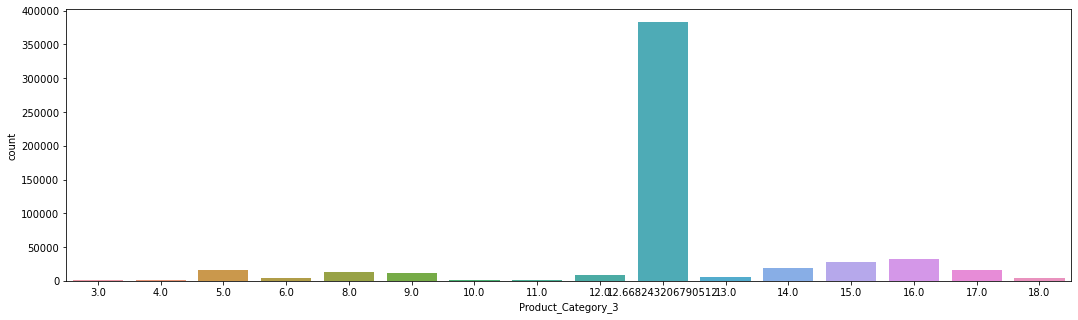

In [28]:
plt.figure(figsize=(18,5))
sns.countplot(x=df_train.Product_Category_3)
plt.show()

# Purchase

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

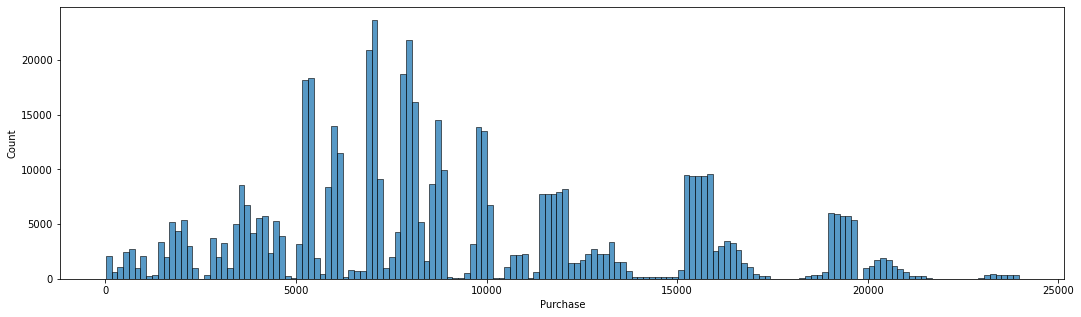

In [29]:
plt.figure(figsize=(18,5))
sns.histplot(x=df_train.Purchase)
plt.show()

# Bai variant analysis

In [30]:
df_train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

# sampling

In [32]:
df_sam=df_train.sample(n=20000)

In [33]:
df_sam.shape

(20000, 12)

# User_ID vs Purchase

In [ ]:

sns.histplot(x=df_sam.User_ID,hue=df_sam.Purchase)


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='User_ID', ylabel='Count'>

C:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


# Product_ID vs Purchase

# Gender vs Purchase

# Age vs Purchase

# Occupation vs Purchase

# City_Category vs Purchase

# Stay_In_Current_City_Years vs Purchase

# Marital_Status vs Purchase

# Product_Category_1 vs Purchase

# Product_Category_2 vs Purchase

# Product_Category_3 vs Purchase